<a href="https://colab.research.google.com/github/SatyamRudrakanthwar/Rock-and-mine-prediction-using-Logistic-Regression/blob/main/Insurance_Cost_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-65-86adeb24b840>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


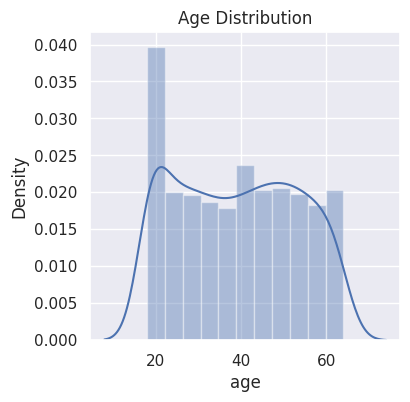

In [ ]:
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

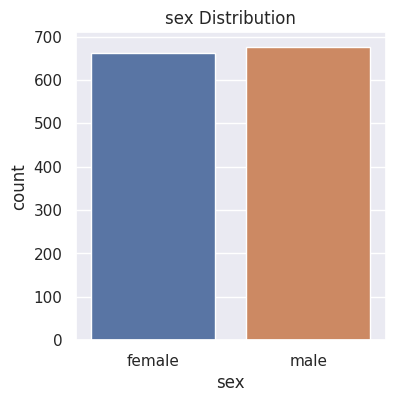

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'sex', data= data)
plt.title('sex Distribution')
plt.show()

In [ ]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-68-aec3afc57fe2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


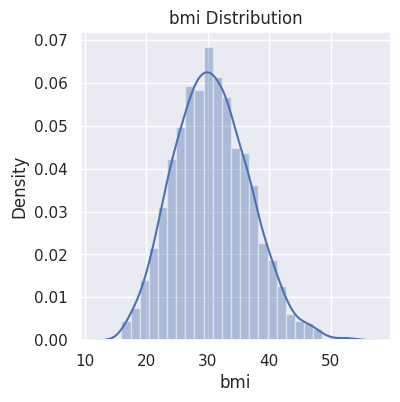

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(data['bmi'])
plt.title('bmi Distribution')
plt.show()

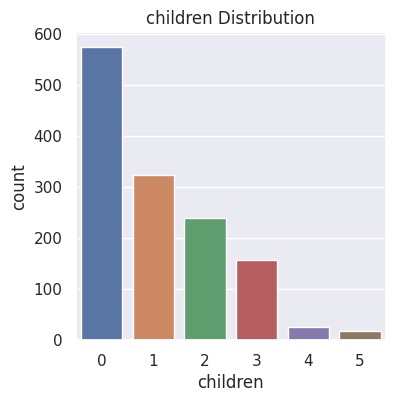

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'children', data= data)
plt.title('children Distribution')
plt.show()

In [ ]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

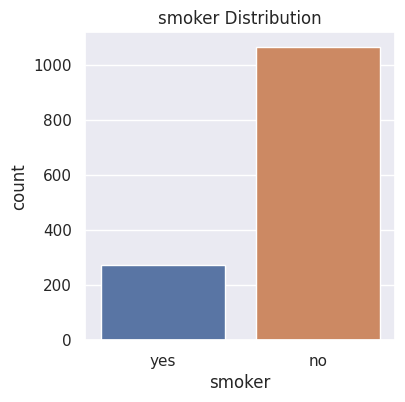

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'smoker', data= data)
plt.title('smoker Distribution')
plt.show()

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

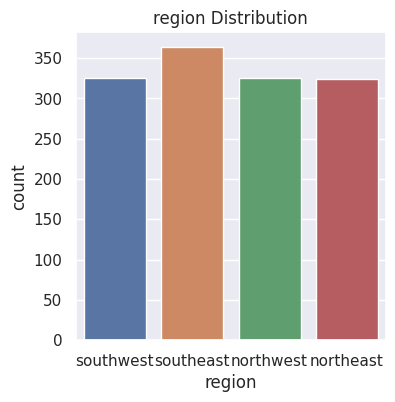

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'region', data= data)
plt.title('region Distribution')
plt.show()

In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-75-92571955c02b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


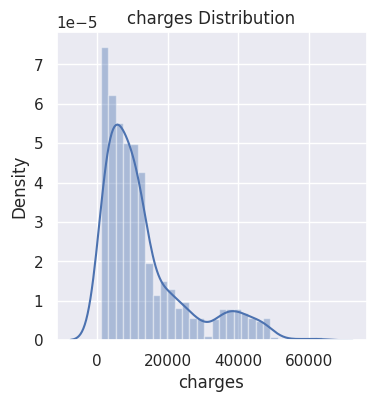

In [ ]:
plt.figure(figsize = (4,4))
sns.distplot(data['charges'])
plt.title('charges Distribution')
plt.show()

In [ ]:
data['charges'].value_counts().head()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
Name: charges, dtype: int64

In [ ]:
data.replace({'sex':{'male' : 0, 'female': 1}}, inplace = True)
data.replace({'smoker':{'yes' : 0, 'no': 1}}, inplace = True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [ ]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X, Y, random_state= 2, test_size= 0.2)
print(x_train.shape)

(1070, 6)


In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
training_data_prediction = regression.predict(x_train)


In [ ]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [ ]:
testing_data_prediction = regression.predict(x_test)


In [ ]:
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [ ]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction= regression.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
